## Electric Vehicle Population Data EDA

This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL).

In [35]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# load data set
electric_vehicle_df =  pd.read_csv(r"C:\Users\jki\Downloads\Electric_Vehicle_Population_Data.csv")
electric_vehicle_df.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEF5L,Thurston,Lacey,WA,98516.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,22.0,124535071,POINT (-122.7474291 47.0821119),PUGET SOUND ENERGY INC,5.306701e+10
1,1N4BZ1CP1K,King,Sammamish,WA,98074.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,45.0,102359449,POINT (-122.0313266 47.6285782),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,5YJXCDE28G,King,Kent,WA,98031.0,2016,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,33.0,228682037,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64177 47.737525),PUGET SOUND ENERGY INC,5.303509e+10
4,WA1F2AFY4P,Thurston,Olympia,WA,98501.0,2023,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,23,0,22.0,234923230,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [36]:


# lets confirm existance of missing values
missing_values = electric_vehicle_df.isna().sum()
print(missing_values)

VIN (1-10)                                           0
County                                               1
City                                                 1
State                                                0
Postal Code                                          1
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 4
DOL Vehicle ID                                       0
Vehicle Location                                     1
Electric Utility                                     1
2020 Census Tract                                    1
dtype: int64


In [38]:
# lets remove missing values
electric_vehicle_df.dropna(subset=['County','City','Postal Code','Legislative District','Vehicle Location','Electric Utility','2020 Census Tract'],inplace =True)
# lets confirm existance of missing values
missing_values = electric_vehicle_df.isna().sum()
print(missing_values)

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


In [39]:
# do we have unncessary negative values ?

electric_vehicle_df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,65531.000000,65531.000000,65531.000000,65531.000000,65531.000000,6.553100e+04,6.553100e+04
mean,98180.385436,2020.347881,63.562940,1184.065938,32.082022,2.158943e+08,5.303401e+10
std,214.340088,2.952367,94.513025,8566.064976,14.261470,7.913640e+07,1.216387e+07
min,98001.000000,1998.000000,0.000000,0.000000,1.000000,4.777000e+03,5.300195e+10
25%,98038.000000,2018.000000,0.000000,0.000000,21.000000,1.776101e+08,5.303301e+10
50%,98109.000000,2021.000000,10.000000,0.000000,36.000000,2.215081e+08,5.303302e+10
75%,98188.000000,2023.000000,84.000000,0.000000,45.000000,2.480819e+08,5.303303e+10
max,99362.000000,2024.000000,337.000000,184400.000000,49.000000,4.789259e+08,5.307794e+10


In [40]:
# let have a look at the data types
electric_vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65531 entries, 0 to 65534
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         65531 non-null  object 
 1   County                                             65531 non-null  object 
 2   City                                               65531 non-null  object 
 3   State                                              65531 non-null  object 
 4   Postal Code                                        65531 non-null  float64
 5   Model Year                                         65531 non-null  int64  
 6   Make                                               65531 non-null  object 
 7   Model                                              65531 non-null  object 
 8   Electric Vehicle Type                              65531 non-null  object 
 9   Clean 

In [41]:
# let change the date data type
electric_vehicle_df['Model Year'] = pd.to_datetime(electric_vehicle_df['Model Year'])
electric_vehicle_df['Model Year'].info()

<class 'pandas.core.series.Series'>
Int64Index: 65531 entries, 0 to 65534
Series name: Model Year
Non-Null Count  Dtype         
--------------  -----         
65531 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1023.9 KB


In [42]:
# let change the electric charge data type
electric_vehicle_df['Electric Range'] = pd.to_numeric(electric_vehicle_df['Electric Range'],errors='coerce')
electric_vehicle_df['Electric Range'].info()

<class 'pandas.core.series.Series'>
Int64Index: 65531 entries, 0 to 65534
Series name: Electric Range
Non-Null Count  Dtype
--------------  -----
65531 non-null  int64
dtypes: int64(1)
memory usage: 1023.9 KB


## 1.What is the average Electric range for the Vehicles

In [43]:
electric_vehicle_df['Electric Range'].mean()
rounded_mean = round(electric_vehicle_df['Electric Range'].mean())
print(rounded_mean)

64


##  2.Whats the Maximum Electric range of the Vehicles

In [26]:
electric_vehicle_df['Electric Range'].max()

337

##  3 Provide top ten counties that had the hightest number of electric vehicles used

County
King         3066482
Clark         382150
Snohomish     195511
Kitsap        193432
Thurston      156711
Jefferson      38263
Cowlitz        33711
Yakima         25979
Pierce         18402
Island         11651
Name: Electric Range, dtype: int64


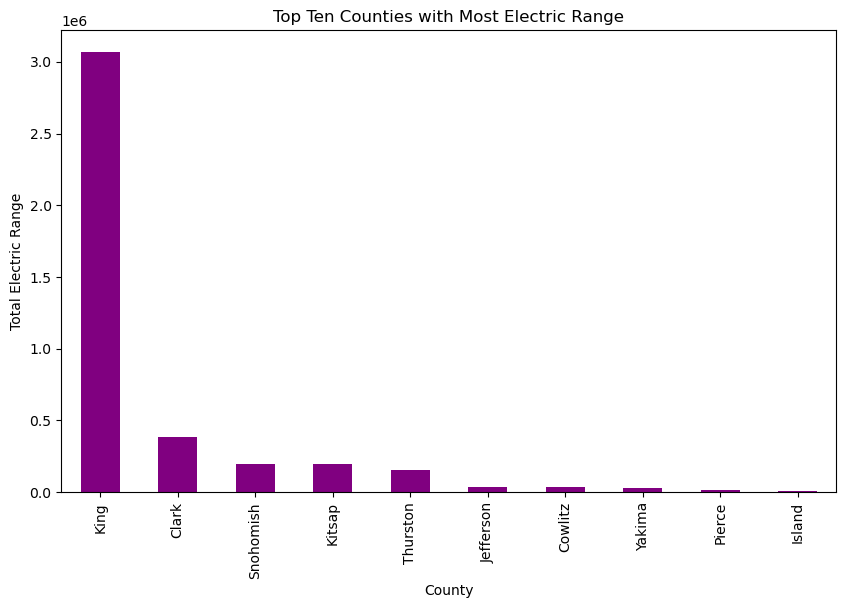

In [45]:
# Load in some packages
import calendar
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

# Group by 'County' and calculate the sum of 'Electric Range'
county_electric_range = electric_vehicle_df.groupby('County')['Electric Range'].sum()

# Sort the values in descending order and select the top ten
top_ten_counties = county_electric_range.sort_values(ascending=False).head(10)

# Display the result
print(top_ten_counties)

# Plot the top ten counties
top_ten_counties.plot(kind='bar', color='purple', figsize=(10, 6))
plt.title('Top Ten Counties with Most Electric Range')
plt.xlabel('County')
plt.ylabel('Total Electric Range')
plt.show()

##  4 Provide top ten Cities that had the hightest number of electric vehicles used

City
Seattle      1061779
Bellevue      375993
Vancouver     230644
Kirkland      221131
Sammamish     216944
Redmond       166695
Bothell       120145
Renton        114256
Olympia       107140
Shoreline      95226
Name: Electric Range, dtype: int64


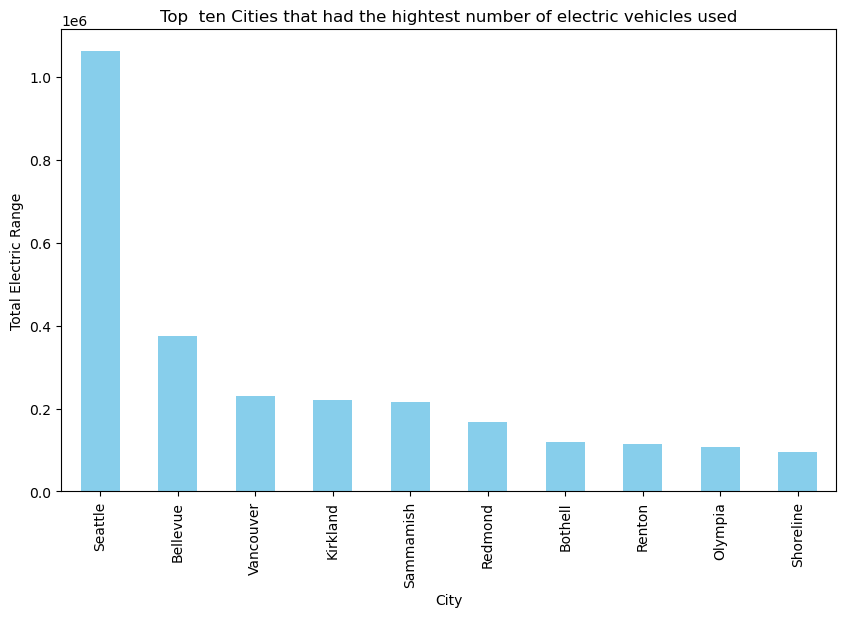

In [46]:
# Group by 'Cities' and calculate the sum of 'Electric Range'
cities_electric_range = electric_vehicle_df.groupby('City')['Electric Range'].sum()

# Sort the values in descending order and select the top ten
top_ten_cities = cities_electric_range.sort_values(ascending=False).head(10)

# Display the result
print(top_ten_cities)

# Plot the top ten Cities
top_ten_cities.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Top  ten Cities that had the hightest number of electric vehicles used')
plt.xlabel('City')
plt.ylabel('Total Electric Range')
plt.show()

##  5 Provide top ten Make that  had the hightest Electric range

Make
TESLA         2535240
NISSAN         458797
CHEVROLET      433072
KIA            135821
BMW            109367
AUDI            77393
TOYOTA          58439
VOLKSWAGEN      49897
CHRYSLER        44622
JEEP            39125
Name: Electric Range, dtype: int64


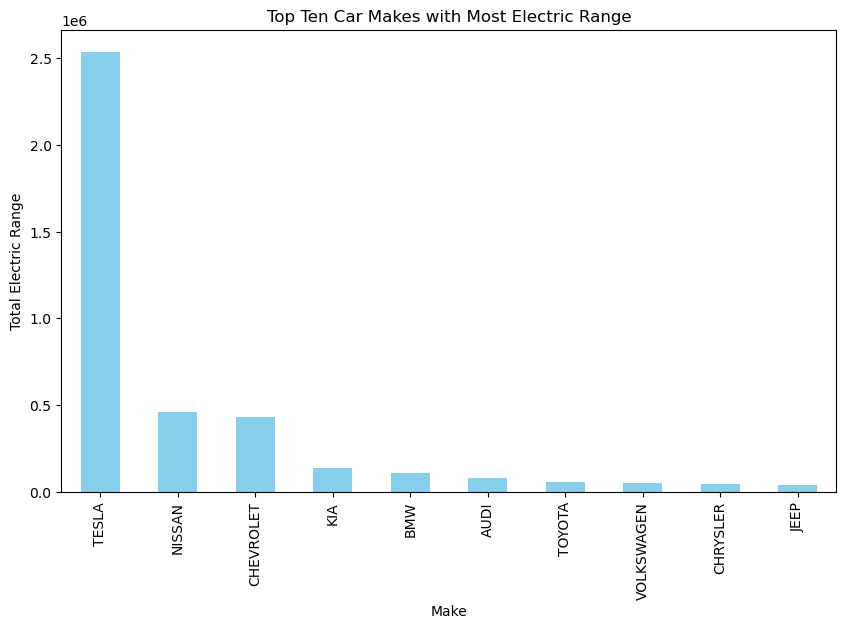

In [50]:
# Group by 'Make' and calculate the sum of 'Electric Range'
make_electric_range = electric_vehicle_df.groupby('Make')['Electric Range'].sum()

# Sort the values in descending order and select the top ten
top_ten_make = make_electric_range.sort_values(ascending=False).head(10)

# Display the result
print(top_ten_make)

# Plot the top ten Car Makes
top_ten_make.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Top Ten Car Makes with Most Electric Range')
plt.xlabel('Make')
plt.ylabel('Total Electric Range')
plt.show()

##  6 Provide top ten Model that  had the hightest Electric range

Model
MODEL 3    1368811
MODEL S     558802
LEAF        458797
BOLT EV     353010
MODEL X     335789
MODEL Y     267138
NIRO         99290
I3           73525
VOLT         72846
E-TRON       60438
Name: Electric Range, dtype: int64


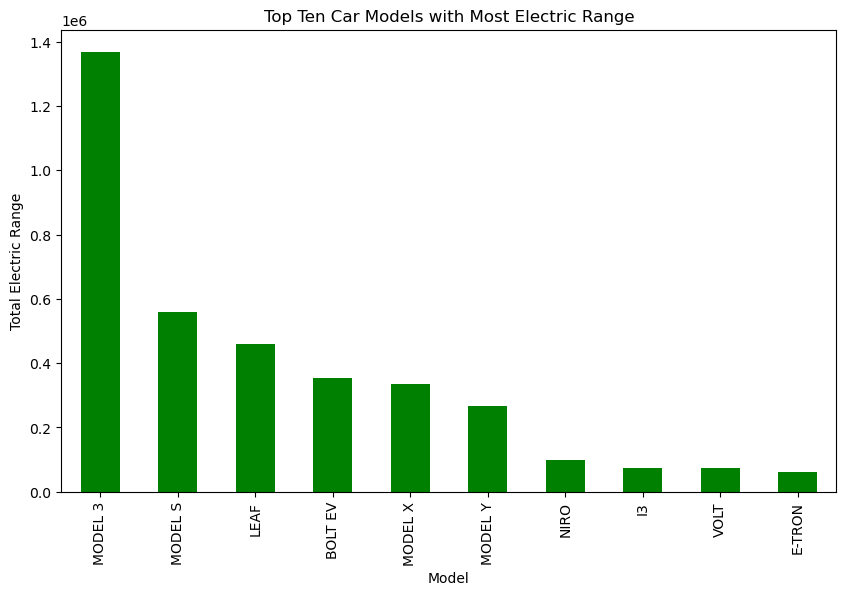

In [53]:
# Group by 'Make' and calculate the sum of 'Electric Range'
model_electric_range = electric_vehicle_df.groupby('Model')['Electric Range'].sum()

# Sort the values in descending order and select the top ten
top_ten_model = model_electric_range.sort_values(ascending=False).head(10)

# Display the result
print(top_ten_model)

# Plot the top ten Car Models
top_ten_model.plot(kind='bar', color='green', figsize=(10, 6))
plt.title('Top Ten Car Models with Most Electric Range')
plt.xlabel('Model')
plt.ylabel('Total Electric Range')
plt.show()

##  7 Provide top ten Electric Vehicle Type that  had the hightest Electric range

Electric Vehicle Type
Battery Electric Vehicle (BEV)            3735456
Plug-in Hybrid Electric Vehicle (PHEV)     429887
Name: Electric Range, dtype: int64


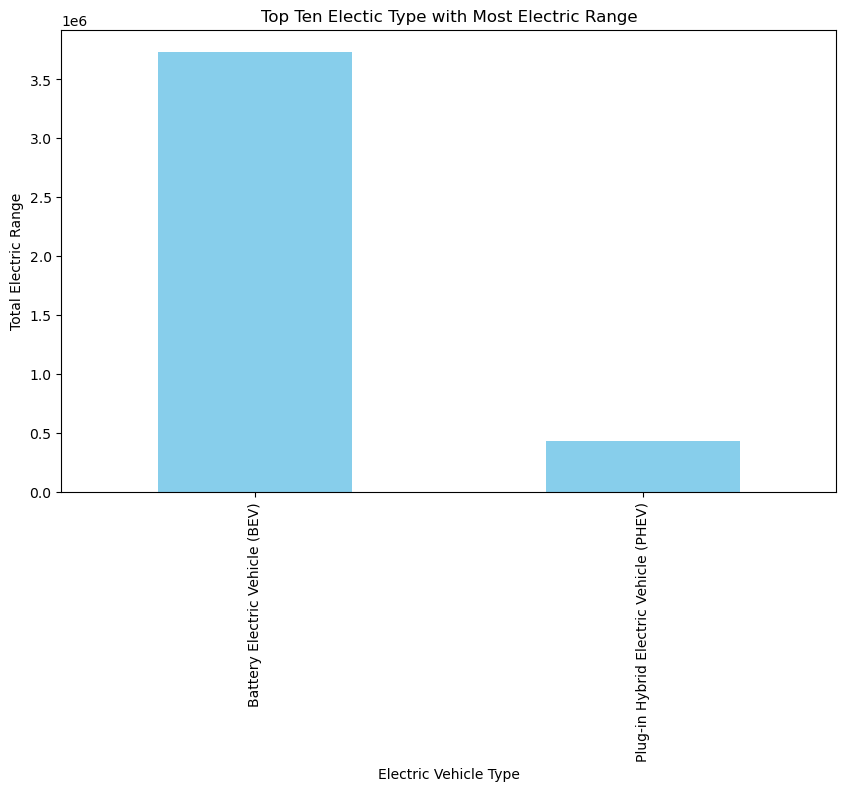

In [54]:
# Group by 'Vehicle Type' and calculate the sum of 'Electric Range'
vehicle_type_electric_range = electric_vehicle_df.groupby('Electric Vehicle Type')['Electric Range'].sum()

# Sort the values in descending order and select the top ten
top_ten_vehicle_type = vehicle_type_electric_range.sort_values(ascending=False).head(10)

# Display the result
print(top_ten_vehicle_type)

# Plot the top ten counties
top_ten_vehicle_type.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Top Ten Electic Type with Most Electric Range')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Total Electric Range')
plt.show()

## 7 Provide top ten Electric Utility that had the hightest Electric range

Electric Utility
PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)                                            1889741
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)                                             1179951
PUGET SOUND ENERGY INC                                                                    548023
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)                          372264
BONNEVILLE POWER ADMINISTRATION||PUGET SOUND ENERGY INC||PUD NO 1 OF JEFFERSON COUNTY      37016
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF COWLITZ COUNTY                                33711
PACIFICORP                                                                                 23543
BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOHOMISH COUNTY                                 11004
BONNEVILLE POWER ADMINISTRATION||PACIFICORP||PUD NO 1 OF CLARK COUNTY - (WA)                9886
BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY             9655
Name: Electri

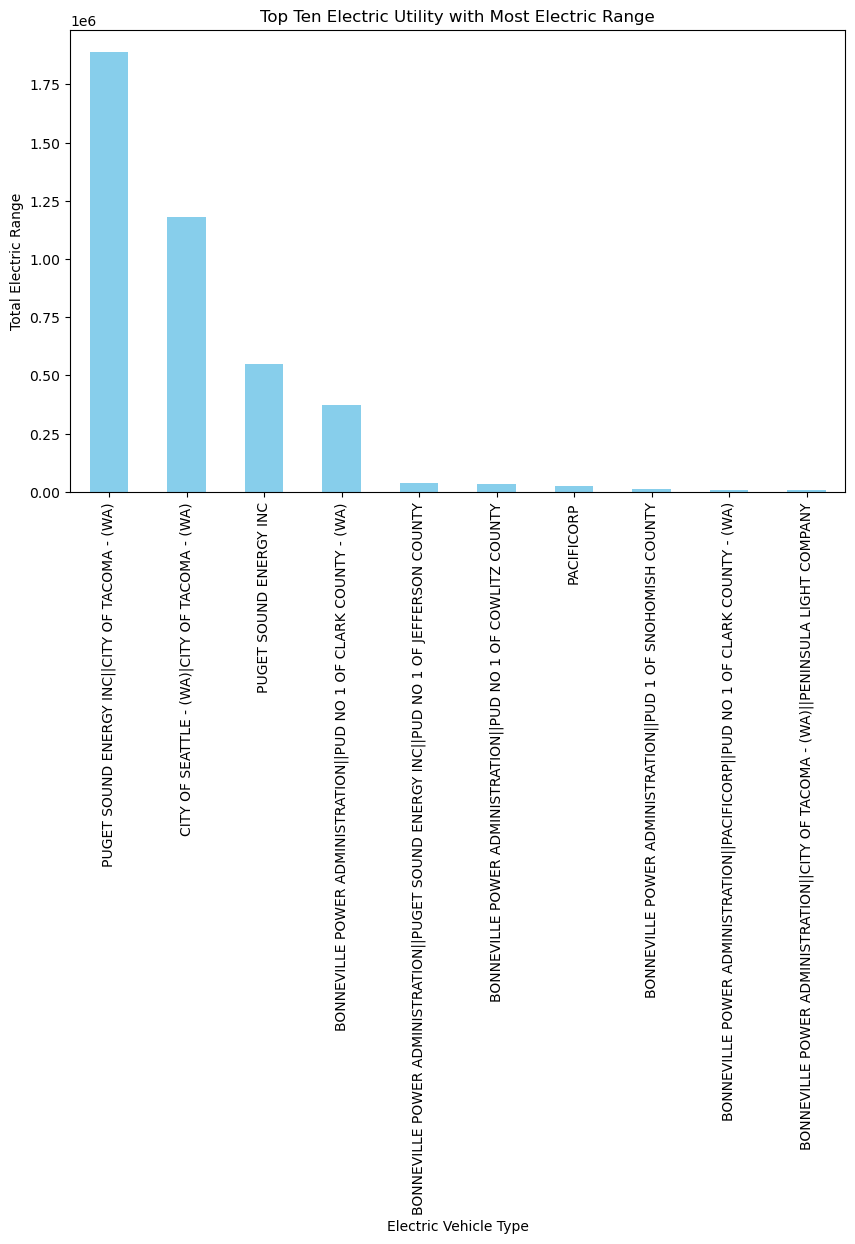

In [55]:
# Group by 'Electric Utility' and calculate the sum of 'Electric Range'
Electric_Utility_electric_range = electric_vehicle_df.groupby('Electric Utility')['Electric Range'].sum()

# Sort the values in descending order and select the top ten
top_ten_Electric_Utility= Electric_Utility_electric_range.sort_values(ascending=False).head(10)

# Display the result
print(top_ten_Electric_Utility)

# Plot the top ten Electric Utility
top_ten_Electric_Utility.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Top Ten Electric Utility with Most Electric Range')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Total Electric Range')
plt.show()